In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

In [2]:
path = "C:/Users/HP/Documents/Haulage_Products/PriceWatch Analytics/API Database.xlsx"
data = pd.read_excel(path,parse_dates=True)
data_orig = data.copy()

In [3]:
data.head().T

,0,1,2,3,4
Shipper,Ok Foods,Ok Foods,Ok Foods,Ok Foods,Ok Foods
Origin,Lagos,Lagos,Lagos,Lagos,Lagos
Origin City,Oshodi,Oshodi,Oshodi,Oshodi,Oshodi
Destination,Kano,Kano,Sokoto,Lafia,Sokoto
D. State,Kano,Kano,Sokoto,Nasarawa,Sokoto
Total Distance (KM),1066,1066,1040,959,1040
Truck Size,30 Tons,30 Tons,30 Tons,30 Tons,30 Tons
No of Trucks,1,1,1,1,1
Truck Price,490000,490000,510000,530000,510000
THH Price,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(1364, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Shipper              1362 non-null   object        
 1   Origin               1362 non-null   object        
 2   Origin City          1362 non-null   object        
 3   Destination          1362 non-null   object        
 4   D. State             1362 non-null   object        
 5   Total Distance (KM)  1362 non-null   float64       
 6   Truck Size           1362 non-null   object        
 7   No of Trucks         1362 non-null   float64       
 8   Truck Price          1327 non-null   float64       
 9   THH Price            0 non-null      float64       
 10  Vendor               1358 non-null   object        
 11  Truck No             1324 non-null   object        
 12  Date Request         1362 non-null   datetime64[ns]
 13  Date Provided        1362 non-nul

In [6]:
data['Destination'] =data['Destination'].str.strip()

In [7]:
data['Destination'].value_counts()

Kano             269
Maiduguri        198
Onitsha          190
Yola             135
Port Harcourt     87
                ... 
Nsukka             1
Karaye             1
Gboko/Oturkpo      1
Obollo Afor        1
Jigawa/Mag         1
Name: Destination, Length: 74, dtype: int64

In [8]:
data['Origin'].unique()

array(['Lagos', 'Rivers', nan], dtype=object)

In [9]:
data.isnull().sum()

Shipper                   2
Origin                    2
Origin City               2
Destination               2
D. State                  2
Total Distance (KM)       2
Truck Size                2
No of Trucks              2
Truck Price              37
THH Price              1364
Vendor                    6
Truck No                 40
Date Request              2
Date Provided             2
Date Loaded               2
Date Mobilized            2
E.L Time                  0
E. Arrival Date        1263
Arrival Date            130
Date Offloaded          131
Truck Lead Time        1263
Product Type              0
Inflation rate (%)        2
dtype: int64

In [10]:
data.columns

Index(['Shipper', 'Origin', 'Origin City', 'Destination', 'D. State',
       'Total Distance (KM)', 'Truck Size', 'No of Trucks', 'Truck Price',
       'THH Price', 'Vendor', 'Truck No', 'Date Request ', 'Date Provided',
       'Date Loaded', 'Date Mobilized ', 'E.L Time', 'E. Arrival Date',
       'Arrival Date', 'Date Offloaded', 'Truck Lead Time', 'Product Type',
       'Inflation rate (%)'],
      dtype='object')

In [11]:
col = ['Shipper', 'Origin', 'Origin City', 'Destination', 'D. State','Truck Size', 'No of Trucks','Date Request ']
ts = data[col]

In [12]:
ts.head()

,Shipper,Origin,Origin City,Destination,D. State,Truck Size,No of Trucks,Date Request
0,Ok Foods,Lagos,Oshodi,Kano,Kano,30 Tons,1.0,2019-07-30
1,Ok Foods,Lagos,Oshodi,Kano,Kano,30 Tons,1.0,2019-08-05
2,Ok Foods,Lagos,Oshodi,Sokoto,Sokoto,30 Tons,1.0,2019-08-08
3,Ok Foods,Lagos,Oshodi,Lafia,Nasarawa,30 Tons,1.0,2019-08-09
4,Ok Foods,Lagos,Oshodi,Sokoto,Sokoto,30 Tons,1.0,2019-08-10


In [13]:
ts.isnull().sum()

Shipper          2
Origin           2
Origin City      2
Destination      2
D. State         2
Truck Size       2
No of Trucks     2
Date Request     2
dtype: int64

In [14]:
ts = ts.dropna()

In [15]:
ts

,Shipper,Origin,Origin City,Destination,D. State,Truck Size,No of Trucks,Date Request
0,Ok Foods,Lagos,Oshodi,Kano,Kano,30 Tons,1.0,2019-07-30
1,Ok Foods,Lagos,Oshodi,Kano,Kano,30 Tons,1.0,2019-08-05
2,Ok Foods,Lagos,Oshodi,Sokoto,Sokoto,30 Tons,1.0,2019-08-08
3,Ok Foods,Lagos,Oshodi,Lafia,Nasarawa,30 Tons,1.0,2019-08-09
4,Ok Foods,Lagos,Oshodi,Sokoto,Sokoto,30 Tons,1.0,2019-08-10
...,...,...,...,...,...,...,...,...
1357,Promasidor,Lagos,Isolo,Maiduguri,Borno,30 Tons,1.0,2021-04-08
1358,Promasidor,Lagos,Isolo,Yola,Adamawa,30 Tons,1.0,2021-04-09
1359,Ok Foods,Lagos,Oshodi,Kano,Kano,30 Tons,1.0,2021-04-10
1360,Ok Foods,Lagos,Oshodi,Kano,Kano,30 Tons,1.0,2021-04-10


In [16]:
ts.set_index('Date Request ',inplace=True)

In [17]:
ts

,Shipper,Origin,Origin City,Destination,D. State,Truck Size,No of Trucks
Date Request,,,,,,,
2019-07-30,Ok Foods,Lagos,Oshodi,Kano,Kano,30 Tons,1.0
2019-08-05,Ok Foods,Lagos,Oshodi,Kano,Kano,30 Tons,1.0
2019-08-08,Ok Foods,Lagos,Oshodi,Sokoto,Sokoto,30 Tons,1.0
2019-08-09,Ok Foods,Lagos,Oshodi,Lafia,Nasarawa,30 Tons,1.0
2019-08-10,Ok Foods,Lagos,Oshodi,Sokoto,Sokoto,30 Tons,1.0
...,...,...,...,...,...,...,...
2021-04-08,Promasidor,Lagos,Isolo,Maiduguri,Borno,30 Tons,1.0
2021-04-09,Promasidor,Lagos,Isolo,Yola,Adamawa,30 Tons,1.0
2021-04-10,Ok Foods,Lagos,Oshodi,Kano,Kano,30 Tons,1.0


In [18]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1362 entries, 2019-07-30 to 2021-04-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Shipper       1362 non-null   object 
 1   Origin        1362 non-null   object 
 2   Origin City   1362 non-null   object 
 3   Destination   1362 non-null   object 
 4   D. State      1362 non-null   object 
 5   Truck Size    1362 non-null   object 
 6   No of Trucks  1362 non-null   float64
dtypes: float64(1), object(6)
memory usage: 85.1+ KB


In [19]:
ts.index

DatetimeIndex(['2019-07-30', '2019-08-05', '2019-08-08', '2019-08-09',
               '2019-08-10', '2019-08-20', '2019-08-20', '2019-08-20',
               '2019-08-20', '2019-08-21',
               ...
               '2021-04-07', '2021-04-07', '2021-04-07', '2021-04-08',
               '2021-04-08', '2021-04-08', '2021-04-09', '2021-04-10',
               '2021-04-10', '2021-04-10'],
              dtype='datetime64[ns]', name='Date Request ', length=1362, freq=None)

In [20]:
ts['D. State'].value_counts()      

Kano           270
Anambra        215
Borno          213
Adamawa        144
Rivers          89
Sokoto          88
Kaduna          51
Delta           40
Kogi            34
Bauchi          26
Abia            23
Gombe           23
Imo             14
Jigawa          12
Nasarawa        12
Edo             11
FCT             11
Katsina         11
Kebbi           10
Niger            9
Benue            7
Enugu            7
Ebonyi           6
Akwa Ibom        6
Yobe             5
Zamfara          5
Plateau          5
Bayelsa          4
Cross River      4
Lagos            4
Oyo              3
Name: D. State, dtype: int64

In [21]:
regions ={'Benue':'NC','Kogi':'NC','Nasarawa':'NC',
 'Kwara':'NC','Niger':'NC','Plateau':'NC',
 'FCT':'NC','Adamawa' :'NE','Bauchi':'NE',
 'Borno':'NE','Gombe':'NE','Taraba':'NE',
 'Yobe':'NE','Jigawa':'NW','Kaduna':'NW',
 'Kano':'NW','Katsina':'NW','Kebbi':'NW',
 'Sokoto':'NW','Zamfara':'NW','Abia':'SE',
 'Anambra':'SE','Ebonyi':'SE','Enugu':'SE',
 'Imo':'SE','Akwa Ibom':'SS', 'Bayelsa':'SS',
 'Cross River':'SS','Rivers':'SS','Edo':'SS',
 'Delta':'SS','Ekiti':'SW','Lagos':'SW',
 'Ogun':'SW','Ondo':'SW','Osun':'SW','Oyo':'SW'}

In [22]:
ts

,Shipper,Origin,Origin City,Destination,D. State,Truck Size,No of Trucks
Date Request,,,,,,,
2019-07-30,Ok Foods,Lagos,Oshodi,Kano,Kano,30 Tons,1.0
2019-08-05,Ok Foods,Lagos,Oshodi,Kano,Kano,30 Tons,1.0
2019-08-08,Ok Foods,Lagos,Oshodi,Sokoto,Sokoto,30 Tons,1.0
2019-08-09,Ok Foods,Lagos,Oshodi,Lafia,Nasarawa,30 Tons,1.0
2019-08-10,Ok Foods,Lagos,Oshodi,Sokoto,Sokoto,30 Tons,1.0
...,...,...,...,...,...,...,...
2021-04-08,Promasidor,Lagos,Isolo,Maiduguri,Borno,30 Tons,1.0
2021-04-09,Promasidor,Lagos,Isolo,Yola,Adamawa,30 Tons,1.0
2021-04-10,Ok Foods,Lagos,Oshodi,Kano,Kano,30 Tons,1.0


In [23]:
def get_region(state):
    return regions[state]

In [24]:
ts['regions'] = ts['D. State'].apply(get_region)

In [25]:
ts

,Shipper,Origin,Origin City,Destination,D. State,Truck Size,No of Trucks,regions
Date Request,,,,,,,,
2019-07-30,Ok Foods,Lagos,Oshodi,Kano,Kano,30 Tons,1.0,NW
2019-08-05,Ok Foods,Lagos,Oshodi,Kano,Kano,30 Tons,1.0,NW
2019-08-08,Ok Foods,Lagos,Oshodi,Sokoto,Sokoto,30 Tons,1.0,NW
2019-08-09,Ok Foods,Lagos,Oshodi,Lafia,Nasarawa,30 Tons,1.0,NC
2019-08-10,Ok Foods,Lagos,Oshodi,Sokoto,Sokoto,30 Tons,1.0,NW
...,...,...,...,...,...,...,...,...
2021-04-08,Promasidor,Lagos,Isolo,Maiduguri,Borno,30 Tons,1.0,NE
2021-04-09,Promasidor,Lagos,Isolo,Yola,Adamawa,30 Tons,1.0,NE
2021-04-10,Ok Foods,Lagos,Oshodi,Kano,Kano,30 Tons,1.0,NW


In [26]:
ts.isnull().sum()

Shipper         0
Origin          0
Origin City     0
Destination     0
D. State        0
Truck Size      0
No of Trucks    0
regions         0
dtype: int64

In [27]:
report=ProfileReport(ts,title='Profiling Report')

In [28]:
report.to_widgets()

In [29]:
lagos = ts[ts['Origin'] == 'Lagos']

In [30]:
rivers =  ts[ts['Origin'] == 'Rivers']

In [31]:
lag_NW = ts[ts.regions == 'NW'] 
lag_NC = ts[ts.regions == 'NC'] 
lag_NE = ts[ts.regions == 'NE'] 
lag_SS = ts[ts.regions == 'SS'] 
lag_SW = ts[ts.regions == 'SW'] 
lag_SE = ts[ts.regions == 'SE'] 

In [32]:
lag_NW['Truck Size'].value_counts()

30 Tons    423
40 Tons     17
35 Tons      5
45 Tons      2
Name: Truck Size, dtype: int64

In [33]:
lag_NW['No of Trucks']

Date Request 
2019-07-30    1.0
2019-08-05    1.0
2019-08-08    1.0
2019-08-10    1.0
2019-08-20    1.0
             ... 
2021-04-07    1.0
2021-04-07    1.0
2021-04-07    1.0
2021-04-10    1.0
2021-04-10    1.0
Name: No of Trucks, Length: 447, dtype: float64

In [34]:
resample = lag_NW.resample('W')
weekly_lag_NW = resample.sum()

In [35]:
data = weekly_lag_NW

In [42]:
train.tail()

,No of Trucks
Date Request,
2020-09-06,4.0
2020-09-13,6.0
2020-09-20,2.0
2020-09-27,7.0
2020-10-04,8.0


In [36]:
train = data[:int(0.7 *(len(data)))]
valid = data[int(0.7 *(len(data))):]

<AxesSubplot:xlabel='Date Request '>

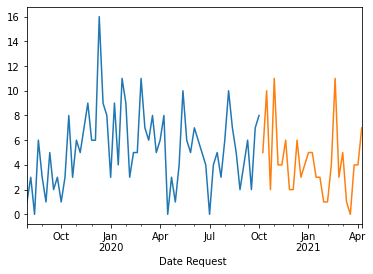

In [37]:
train['No of Trucks'].plot()
valid['No of Trucks'].plot()

In [38]:
from pmdarima.arima import auto_arima

model = auto_arima(train, trace=True, error_action='ignore',
                  suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=320.989, Time=1.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=318.775, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=316.826, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=317.636, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=403.294, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=317.937, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=317.222, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=319.156, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=338.460, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 2.685 seconds


ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

In [39]:
pip install sklearn-json


In [40]:
import pickle
from flask import Flask,render_template,request
import sklearn_json as skljson

In [41]:
skljson.to_json(model, 'model')
#deserialized_model = skljson.from_json(file_name)

ModellNotSupported: This model type is not currently supported. Email support@mlrequest.com to request a feature or report a bug.

In [ ]:
pickle.dump(model, open('model.pkl', 'wb'))

In [ ]:
model = pickle.load(open('model.pkl', 'rb'))

In [ ]:
model.predict(n_periods=len(valid))

In [ ]:
app = Flask(__name__)

In [ ]:
@app.route('/')

def home():
    return render_template('index.html')

In [ ]:
@app.route('/predict', methods=['POST'])

def predict():
    
    int_feat = [float(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)
    output = round(prediction[0],2)
    return render_template('index.html', prediction_text ='The Truck Demand this week is : {}'.format(output))

In [ ]:
27 *

In [ ]:
len(valid)

In [39]:
forecast= model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index=valid.index,
                       columns=['Predictions'])

In [40]:
forecast

,Predictions
Date Request,
2020-10-11,6.002533
2020-10-18,5.499231
2020-10-25,5.372414
2020-11-01,5.340460
2020-11-08,5.332409
2020-11-15,5.330380
2020-11-22,5.329869
2020-11-29,5.329740
2020-12-06,5.329708


In [41]:
valid

,No of Trucks
Date Request,
2020-10-11,5.0
2020-10-18,10.0
2020-10-25,2.0
2020-11-01,11.0
2020-11-08,4.0
2020-11-15,4.0
2020-11-22,6.0
2020-11-29,2.0
2020-12-06,2.0


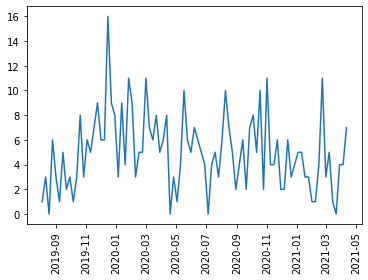

In [42]:
plt.plot(weekly_lag_NW)
plt.xticks(rotation=90);

In [43]:
from statsmodels.tsa.stattools import adfuller

In [44]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    orig = plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xticks(rotation=90);
    plt.show(block=False)
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[:4], index=['Test Statistic','p-value',
                                             '#Lags Used','# of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)

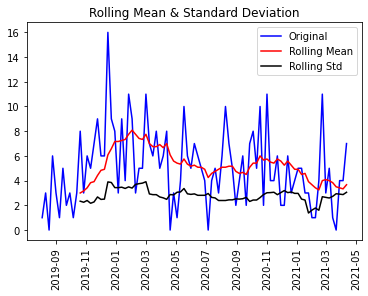

Results of Dickey-Fuller Test:
Test Statistic           -7.731262e+00
p-value                   1.123777e-11
#Lags Used                0.000000e+00
# of Observations Used    8.800000e+01
Critical Value (1%)      -3.506944e+00
dtype: float64
Test Statistic           -7.731262e+00
p-value                   1.123777e-11
#Lags Used                0.000000e+00
# of Observations Used    8.800000e+01
Critical Value (1%)      -3.506944e+00
Critical Value (5%)      -2.894990e+00
dtype: float64
Test Statistic           -7.731262e+00
p-value                   1.123777e-11
#Lags Used                0.000000e+00
# of Observations Used    8.800000e+01
Critical Value (1%)      -3.506944e+00
Critical Value (5%)      -2.894990e+00
Critical Value (10%)     -2.584615e+00
dtype: float64


In [45]:
test_stationarity(weekly_lag_NW)